Transform coding


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [8]:
x0=np.array([65,75,60,70,56,80,68,50,40,50,69,62,76,64])
x1=np.array([170,188,150,170,130,203,160,110,80,153,148,140,164,120])
print("Original sequence for height:",x0)
print("Original sequence for weight:",x1)

Original sequence for height: [65 75 60 70 56 80 68 50 40 50 69 62 76 64]
Original sequence for weight: [170 188 150 170 130 203 160 110  80 153 148 140 164 120]


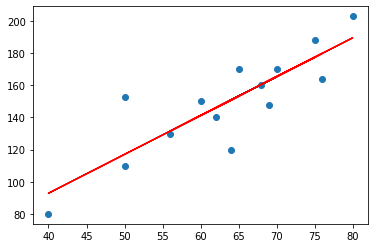

In [16]:
plt.scatter(x0,x1)
m,b= np.polyfit(x0,x1,1)

plt.plot(x0,x0*m+b, 'r')

In [17]:
print(m)

2.4178663071369546


In [19]:
m=2.41 # slope of the line
print("Slope:",m)
s=math.atan(m) # Find the angle for tranfomation matrix 
#s= round(s*180/np.pi,2)
print("Angle of transformation matrix:",s)


Slope: 2.41
Angle of transformation matrix: 1.177479262631279


In [20]:
A=np.array([[math.cos(s), math.sin(s)], [(-(math.sin(s))), math.cos(s)]])
print(A)

[[ 0.3832543   0.92364286]
 [-0.92364286  0.3832543 ]]


In [28]:
""""
t0= A[0,0]*x0 + A[0,1]*x1
t1= A[1,0]*x0 + A[1,1]*x1
"""

'"\nt0= A[0,0]*x0 + A[0,1]*x1\nt1= A[1,0]*x1 + A[1,1]*x1\n'

In [31]:
#Creating vectors to store the transformed value
t0= np.array(np.zeros(len(x0)), dtype=int)
t1= np.array(np.zeros(len(x0)), dtype=int)

In [32]:
#To find the value of the compressed data t= Ax
for i in range(len(x0)):
    t0[i]= A[0,0]*x0[i] + A[0,1]*x1[i]
    t1[i]= A[1,0]*x0[i] + A[1,1]*x1[i]
print(t0)
print(t1)

[181 202 161 183 141 218 173 120  89 160 163 153 180 135]
[  5   2   2   0  -1   3  -1  -4  -6  12  -7  -3  -7 -13]


In [ ]:
# To achieve compression, discard t1 vector 
#CR= 28/14=2


In [33]:
# For decompression, make values of t1 vector equal to zero
t1= np.array(np.zeros(len(x0)), dtype=int)
# Obtain transform matrix inverse to recover the compressed data
Ainv= np.linalg.inv(A)
print(Ainv)

[[ 0.3832543  -0.92364286]
 [ 0.92364286  0.3832543 ]]


In [34]:
#Creating vectors to store the recovered value
x0est= np.array(np.zeros(len(x0)), dtype=int)
x1est= np.array(np.zeros(len(x0)), dtype=int)

In [35]:
#To find the value of the reconstructed/recovered/estimated data xest= Ainv*t
for i in range(len(x0)):
    x0est[i]= Ainv[0,0]*t0[i] + Ainv[0,1]*t1[i]
    x1est[i]= Ainv[1,0]*t0[i] + Ainv[1,1]*t1[i]
print(x0est)
print(x1est)

[69 77 61 70 54 83 66 45 34 61 62 58 68 51]
[167 186 148 169 130 201 159 110  82 147 150 141 166 124]


In [49]:
#5.86, 2.42
#
# To find Mean Square Error

sumh=0
sumw=0
for i in range(len(x0)):
    sumh= sumh+((x0[i]-x0est[i]))**2
    sumw= sumw+((x1[i]-x1est[i]))**2
mseh= sumh/len(x0)
msew= sumw/len(x0)
  
print(mseh,msew)

37.0 6.285714285714286


In [47]:
mse = (np.square(x0 - x0est)).mean(axis= None)
print(mse)

37.0
